In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
Data = pd.read_csv('riceseeds.csv')
Data.head(6)

,ID,Species,F1,F2,F3,F2/F3,F1/V,Eccentricity,7,8,...,253,254,255,256,257,258,259,260,261,262
0,1,BC15,0.26242,0.20654,0.17159,0.15826,0.13428,0.11743,0.105070,0.096976,...,0.53561,0.53988,0.53785,0.54262,14253,240.43,76.130,0.31664,0.038539,0.94855
1,2,BC15,0.31821,0.23118,0.18412,0.17612,0.14412,0.12382,0.109860,0.100490,...,0.51014,0.51328,0.51246,0.51035,12607,218.46,74.044,0.33894,0.039736,0.94081
2,3,BC15,0.32834,0.25076,0.19865,0.18694,0.15487,0.13260,0.117560,0.108020,...,0.54310,0.54311,0.54349,0.54735,12466,218.15,73.619,0.33747,0.040051,0.94134
3,4,BC15,0.27924,0.20974,0.17183,0.16021,0.13328,0.11572,0.103010,0.094112,...,0.53562,0.53882,0.53679,0.53728,12420,215.46,74.641,0.34644,0.041690,0.93807
4,5,BC15,0.32191,0.23589,0.19659,0.18134,0.14963,0.12903,0.113610,0.103620,...,0.52167,0.52311,0.52263,0.52652,13851,238.71,74.448,0.31187,0.038821,0.95012
5,6,BC15,0.23378,0.17452,0.14777,0.13832,0.11693,0.10346,0.093782,0.087303,...,0.54878,0.55209,0.55026,0.55208,13137,224.71,75.221,0.33475,0.039389,0.94231


In [2]:
import random
SampleData = Data[Data['Species'].isin(random.sample(list(Data["Species"].unique()), 6))]

In [3]:
SampleData[['ID','Species','F1','F2','F3','F2/F3','F1/V','Eccentricity']]

,ID,Species,F1,F2,F3,F2/F3,F1/V,Eccentricity
672,673,KhangDan18,0.17045,0.121210,0.099851,0.097442,0.081499,0.072417
673,674,KhangDan18,0.16551,0.115510,0.100910,0.094789,0.079017,0.070744
674,675,KhangDan18,0.16489,0.113090,0.100570,0.094093,0.079053,0.071015
675,676,KhangDan18,0.17600,0.122430,0.104940,0.101470,0.085333,0.076689
676,677,KhangDan18,0.16452,0.116650,0.090728,0.092044,0.076726,0.067945
677,678,KhangDan18,0.17119,0.134930,0.108250,0.104460,0.089788,0.080600
678,679,KhangDan18,0.16069,0.103860,0.096294,0.091223,0.076710,0.070173
679,680,KhangDan18,0.17589,0.119420,0.097948,0.099986,0.084401,0.076693
680,681,KhangDan18,0.13265,0.108270,0.081497,0.079748,0.068070,0.059862
681,682,KhangDan18,0.14230,0.119420,0.090330,0.088884,0.076025,0.066337


In [7]:
X = SampleData.values[:, 2:7]
Y = SampleData.values[:, 1]
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 96)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
# Fitting the classifier into the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
# Predicting the test set results
Y_pred = classifier.predict(X_test)
print(Y_pred)

['HaNa39' 'HaNa39' 'NPT3' 'NPT3' 'VietThom8' 'KhangDan18' 'NPT3' 'DV108'
 'HaNa39' 'KhangDan18' 'KhangDan18' 'TB13' 'TB13' 'DV108' 'HaNa39'
 'VietThom8' 'HaNa39' 'HaNa39' 'NPT3' 'VietThom8' 'HaNa39' 'KhangDan18'
 'TB13' 'VietThom8' 'TB13' 'NPT3' 'HaNa39' 'KhangDan18' 'TB13' 'NPT3'
 'HaNa39' 'HaNa39' 'HaNa39' 'DV108' 'TB13' 'VietThom8' 'TB13' 'VietThom8'
 'HaNa39' 'DV108' 'TB13' 'VietThom8' 'VietThom8' 'KhangDan18' 'KhangDan18'
 'NPT3' 'NPT3' 'NPT3' 'NPT3' 'TB13' 'DV108' 'DV108' 'KhangDan18'
 'KhangDan18' 'NPT3' 'DV108' 'HaNa39' 'HaNa39' 'TB13' 'TB13' 'VietThom8'
 'VietThom8' 'NPT3' 'TB13' 'HaNa39' 'VietThom8' 'HaNa39' 'NPT3' 'NPT3'
 'VietThom8' 'HaNa39' 'TB13' 'VietThom8' 'KhangDan18' 'NPT3' 'DV108'
 'NPT3' 'NPT3' 'HaNa39' 'NPT3' 'TB13' 'KhangDan18' 'DV108' 'HaNa39'
 'HaNa39' 'NPT3' 'DV108' 'NPT3' 'DV108' 'DV108' 'DV108' 'KhangDan18'
 'HaNa39' 'TB13' 'HaNa39' 'KhangDan18' 'KhangDan18' 'DV108' 'VietThom8'
 'VietThom8' 'TB13' 'VietThom8' 'KhangDan18' 'TB13' 'TB13' 'NPT3' 'DV108'
 'NPT3' 

In [14]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [17]:
print("Accuracy is"), accuracy_score(y_test,Y_pred)*100

Accuracy is


(None, 44.827586206896555)

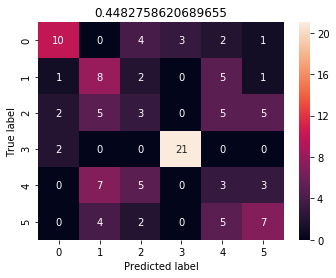

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, Y_pred) 

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(format(accuracy_score(y_test, Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()